#MLPNS 2021 midterm

## instructions

# population trends by country through clustering analysis

# Please read in full before you start!

This exercise combines the two machine learning methods that you have learned so far in this course: linear regression and clustering. 

There are multiple tasks and for some of them, **if you cannot complete the taks,  there are partial solutions you can access** so you don’t get stuck and can continue the exercise and demonstrate your ability to do the following tasks. I strongly encourage you to do so: there are 10 tasks and you only have ~2 hours! If any task takes you more than 20 minutes you should use the shortcut.

I have collected from the World Bank database population grows time series for several countries. 

## The overall goal is to identify countries that have similar population growth trends over the years and possibly countries that have anomalous population growth. 

You will be guided to 
- acquire the data, 
- explore it and prepare it, 
- fit a linear model to the each time series, 
- use the parameters you obtain from that fit as input feature to K-means clustering to group countries based on the trends in the population growth. 
- You will also be asked to look inside the group and if you have time identify reasons why the Countries within the clusters that may suggest why the trends are similar (thiw sill be very speculative of course)

**Make sure you show the characteristics of your data at every step** (by printing the shape of the data, the head of the data, the summary statistics of the data, or plot the data, whichever is apprioriate). 

**Every plot needs to have axis labels and a caption that describes what is being plotted and what should be noted in the plot** (e.g. global trends in the time series)

Your "grade" will be based on the rendered notebook, i.e. on the summary a tables and the plots as I see them and the captions that describe them (the captions can be markdown cells in the notebook).

After grading your notebook based on the rendered version I will restart it and run it. If it runs and produces  identical results you will get 100% of the points awarded in the previous step. Otherwise you will get 75%. **Make sure you stop a few minutes before the time expires to rerun the notebook!**

## feel free to ask question on zoom or on slack!

In [1]:
# these are all the packages I used. But depending on your choices you may need more or other ones. That is ok!

import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
from sklearn.cluster  import KMeans
import scipy.optimize


pl.rcParams['font.size'] = 18


# PART 1 - data preparation


In [2]:
datain = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/midterm/country_pop.csv")



# TASK 1.I - read in the data
the data is available in format _excel_ [here](https://github.com/fedhere/MLPNS2021/tree/main/midterm) called _country_pop.xls_

Pandas has a function, similar to ```read_csv()``` which you used in class, called ```read_excel()```. Download the data in your drive and read it in with this function. You can either download it and read it from your drive. Please put it in a folder My\ Drive/MLPNS (so that I can run the notebook seamlessly without having to change the path since I have the file stored in My\ Drive/MLPNS). 

At the end the file should look like mine below. You should not spend more than 20 minutes on this or you will not have enough time to finish. If after 20 minutes you are still working on it consider using the shortcut

## shortcut: 
if you have troubles reading in the original file with excel you can read in a csv file [here](https://github.com/fedhere/MLPNS2021/tree/main/midterm): the file is called _country_pop.csv_

In [3]:
#leave
datain.head()

,Data Source,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN






#  TASK 1.II - clean the data

how many rows and columns are in the data? how many missing values? missing values should be removed. If there are not many observations (=countries) with missing data the easiest solution is to remove the countries entirely. Use the dataframe method ```dropna``` to remove them. Otherwise, if you are brave, you can input values using the dataframe method fillna (good luck!). 


print the number of countries and the length of the timeline using the line of code provided _before_ and _after_ cleaning. State the percentage of observations lost

## shortcut: 

You can download the dataframe with missing values removed by row [here](https://github.com/fedhere/MLPNS2021/tree/main/midterm): the file is called  _country_pop_clean.csv_

In [4]:
datain.shape

(264, 62)

In [5]:
del datain["2020.0"]
del datain["Data Source"]

In [6]:
datain.shape

(264, 60)

In [7]:
datain

,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1

In [8]:
print("there are {} countries and {} time stamps in the data".
      format(*datain.shape))

there are 264 countries and 60 time stamps in the data


In [9]:
print("there are {} countries and {} time stamps in the cleaned data".
      format(*datain.shape))

there are 264 countries and 60 time stamps in the cleaned data


# TASK 1.III - plot the data

plot the original data. plot all the time series in the same panel. Optionally, also make the plot in log-y space to better see the collection of the data. Describe what you see (you can check my plots [here](https://github.com/fedhere/MLPNS2021/blob/main/midterm/firstFigure.png) - its not a pretty figure, but it is helpful in understanding a lot of characteristivcs of the data! Your figure does not have to look identical to mine

In [10]:
years = np.linspace(1960,2020, num=2019-1960)
md= {}
datain.shape

(264, 60)

In [11]:
for t in range(0,263):
  md[t] = datain.iloc[t]

Il seguente grafico rappresenta la crescita della popolazione di diversi stati in funzione del passare degli anni.
In generale si riconosce un trend di crescita nel numero della popolazione.

Text(0, 0.5, 'population')

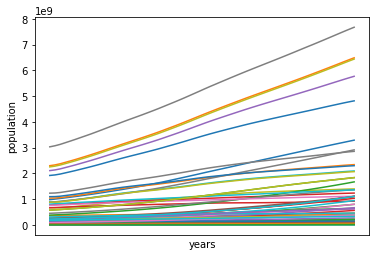

In [12]:
for t in range(0,263):
  pl.plot(md[t])
pl.xlabel("years")
pl.xticks(ticks=[])
pl.ylabel("population")

# TASK 1.IV - scale the data

# Preprocessing
Of course different countries have different population size. But we are only interested in the trends in these exercises, not in the overal size of the country. Thus before fitting a polynomial to the data you need to normalize the lightcurves: from each lightcurve you should remove the mean and divide by the standard deviation. You can do it by hand or you can use the ```preprocessing.scale``` function (there is an example of that in the slides https://slides.com/federicabianco/mlpns_4#/5/8)

_Each time series should be mean 0 and stdev 1_

I recommand working with a numpy array from here forward by extracting the values from the dataframe as ```X = df.values```

**After scaling the data replot it.**

## shortcut

You can get the final dataset [here](https://github.com/fedhere/MLPNS2021/tree/main/midterm), its called _country_pop_final.csv_

In [13]:
mds = {}
for t in range(0,263):
  mds[t] = preprocessing.scale(md[t]);

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numeri

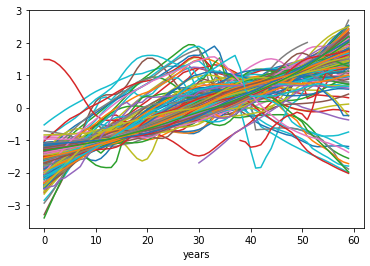

In [14]:
for t in range(0,263):
  pl.plot(mds[t])
  pl.xlabel('years')

# PART 2 - feature engineering



# Task 2.I

fit a second degree polynomial (```y = ax^2 + bx + c```) to each time series. Store the values of a,b,c for each time series in an array called ```features``` (I recommand using L2 for the fit and ```scipy.optimize.minimize```)

For each feature test if the sample is consistent with coming from a normal distribution (with  NHRT test, e.g. we used the KS test in class for this purpose)

**plot the histogram of each feature**

Optional: also store the value of L2 for the best fit parameters. Then your feature space would be 4-dimensional

In [15]:
#def parab(x,a,b,c):
 # return a*x**2 + b*x + c
#def l2(args, x, y):
  #  a, b, c = args
   # return sum((y-parab(x, a, b, c))**2)
#initialg=(10,1,1)
#features = scipy.optimize.minimize(l2, initialg, args=)

In [16]:
X = datain.values
X.shape

(264, 60)

In [17]:
...
features.shape

NameError: ignored

# PART 3 - modeling



# TASK 3.I - preprocess the features

before you can use kmeans clusgtering you have to preprocess (scale) the features: all feature should have mean 0 and stdev 1 (you can again use sklearn.preprocess.scale (save the mean and stdev values... you will need the later)

In [ ]:
...
X2.std(axis=0)


# TASK 2.III - choosing the number of clusters 


cluster the data using kmeans in 2, 3, ... up to 10 clusters and print the total variance for each cluster. 

Plot the total variance as a function of number of clusters. See https://slides.com/federicabianco/mlpns_4#/8/4

Discuss the plot. Does it give insight into what is the the appropriate number of clusters?

Choose a number of clusters and for that choice show the cluster centers.

## shortcut

the elbow plot does not help ... use 4 clusters






# TASK 2.IV - clustering


Note: the cluster centers are datapoints in the feature space. If your feature space is 3D (3 coefficients, or four depending on what you choose in task 2.II) your cluster center is a tuple of numbers. 

**However, the right way to show the cluster centers is to**

1- unscale the cluster centers by multiplying them by the stdev and adding back the mean 

2- plot the polynomial generated by those cluster centers

3- plot the time series that belong to that cluster in the same plot.

Print how many time series are in each cluster.

To measure the intracluster compactness (to make the elbow plot that may help you decide how many clusters to plot use the attribute of the cluster model
```kmeas_fit_model.inertia_```

To extract the cluster centers use 
```kmeas_fit_model.cluster_centers_```

To extract the cluster assignment for each time series use 

```kmeas_fit_model.labels_```

# PART 4 - interpretation





# TASK 4.I
extract the name of the countries in the 2 smallest clusters. Is there anything in common that gives away why they may have the same trends? If you have time try a quick google search

In [ ]:
datain.index[c.labels_ == ...]